# Telco Customer Churn

####  Dataset Story
- **CustomerId** : Customer ID
- **Gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is elderly (1, 0)
- **Partner** : Whether the customer has a partner (Yes, No) ? married or not
- **Dependents** : Whether the customer has dependents (Yes, No) (Children, Parent, Grandparent)
- **Tenure** : The number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has phone service (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines (Yes, No, No phone service)
- **InternetService** : The customer's internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV (Yes, No, No internet service) - Indicates if the customer uses their internet service to stream television programs from a third-party provider
- **StreamingMovies** : Whether the customer has streaming movies (Yes, No, No internet service) - Indicates if the customer uses their internet service to stream movies from a third-party provider
- **Contract** : The customer's contract term (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing (Yes, No)
- **PaymentMethod** : The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned (Yes or No) - Indicates if the customer left the service within the last month or quarter

## 1. Get the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_validate,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df["Churn"] = df["Churn"].replace({'Yes': 1, 'No': 0})

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


In [9]:
df.rename(columns={'tenure': 'Tenure', 'customerID': 'CustomerID', 'gender': 'Gender'}, inplace=True)

In [10]:
df.sample(5)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3322,8058-JMEQO,Female,1,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.450,762.500,1
2004,8565-CLBZW,Male,0,No,No,24,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,89.850,2165.050,1
4656,9800-ONTFE,Female,0,Yes,Yes,22,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.800,1615.100,0
373,2805-EDJPQ,Female,0,Yes,Yes,56,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),99.750,5608.400,0
1322,0114-RSRRW,Female,0,Yes,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.950,187.750,0


In [11]:
df.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## 2. Exploratory Data Analysis (EDA)

In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols

['Gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Churn']

In [13]:
num_cols

['Tenure', 'MonthlyCharges', 'TotalCharges']

In [14]:
cat_but_car

['CustomerID']

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
Tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750
TotalCharges,7032.000,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800
Churn,7043.000,0.265,0.442,0.000,0.000,0.000,1.000,1.000


        Target_Mean  Count  Ratio
Gender                           
Female        0.269   3488 49.524
Male          0.262   3555 50.476




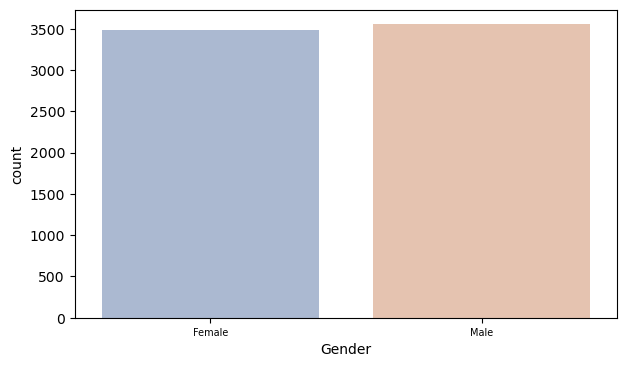

         Target_Mean  Count  Ratio
Partner                           
No             0.330   3641 51.697
Yes            0.197   3402 48.303




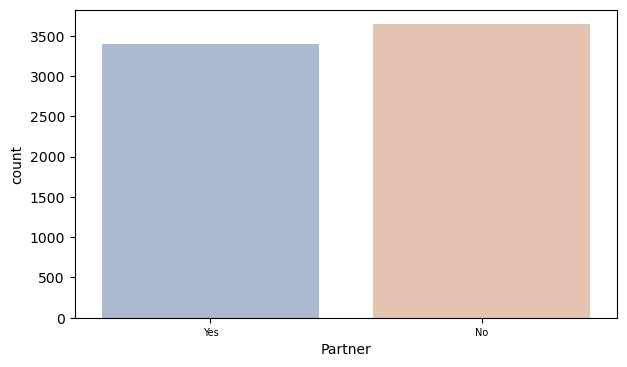

            Target_Mean  Count  Ratio
Dependents                           
No                0.313   4933 70.041
Yes               0.155   2110 29.959




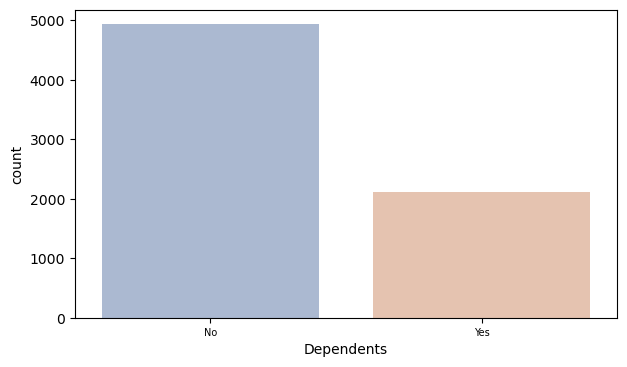

              Target_Mean  Count  Ratio
PhoneService                           
No                  0.249    682  9.683
Yes                 0.267   6361 90.317




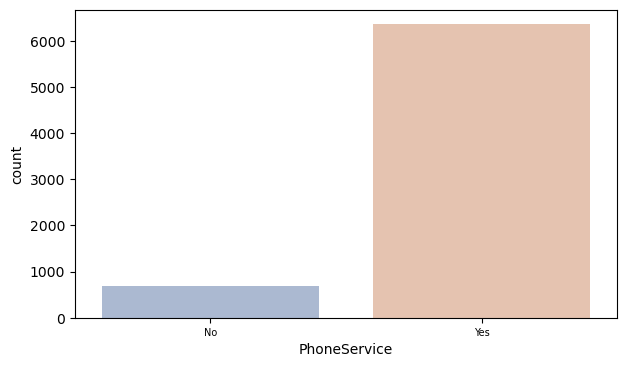

                  Target_Mean  Count  Ratio
MultipleLines                              
No                      0.250   3390 48.133
No phone service        0.249    682  9.683
Yes                     0.286   2971 42.184




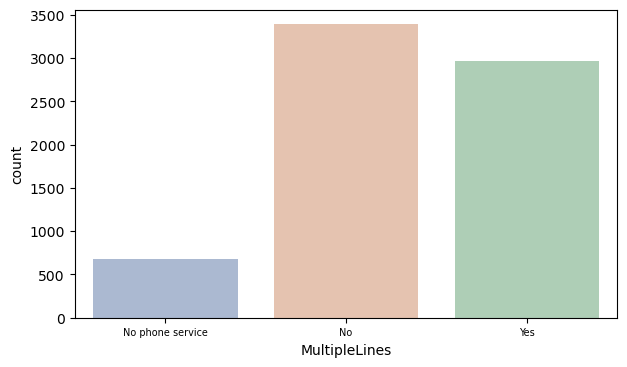

                 Target_Mean  Count  Ratio
InternetService                           
DSL                    0.190   2421 34.375
Fiber optic            0.419   3096 43.959
No                     0.074   1526 21.667




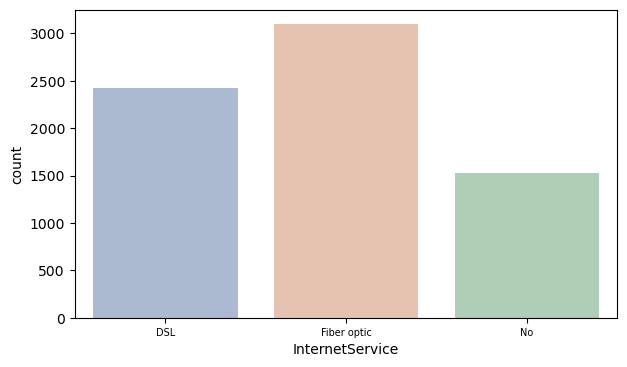

                     Target_Mean  Count  Ratio
OnlineSecurity                                
No                         0.418   3498 49.666
No internet service        0.074   1526 21.667
Yes                        0.146   2019 28.667




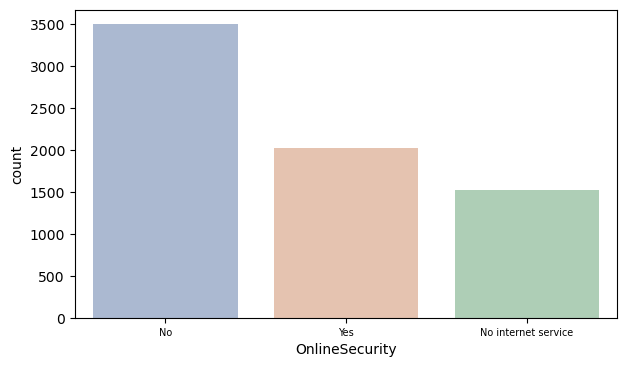

                     Target_Mean  Count  Ratio
OnlineBackup                                  
No                         0.399   3088 43.845
No internet service        0.074   1526 21.667
Yes                        0.215   2429 34.488




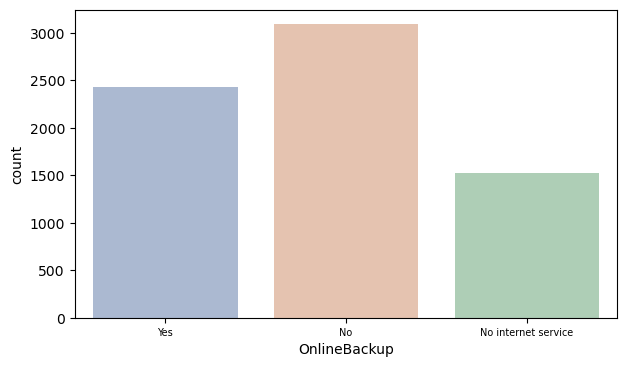

                     Target_Mean  Count  Ratio
DeviceProtection                              
No                         0.391   3095 43.944
No internet service        0.074   1526 21.667
Yes                        0.225   2422 34.389




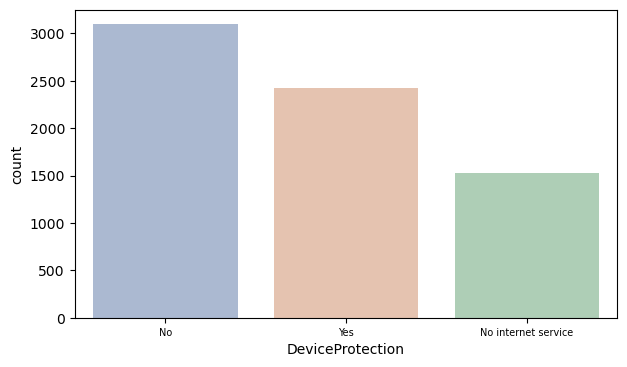

                     Target_Mean  Count  Ratio
TechSupport                                   
No                         0.416   3473 49.311
No internet service        0.074   1526 21.667
Yes                        0.152   2044 29.022




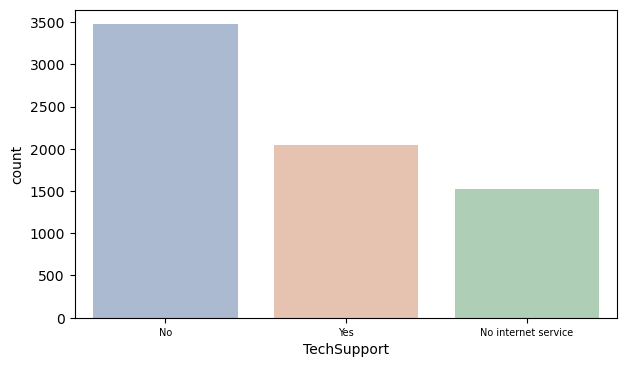

                     Target_Mean  Count  Ratio
StreamingTV                                   
No                         0.335   2810 39.898
No internet service        0.074   1526 21.667
Yes                        0.301   2707 38.435




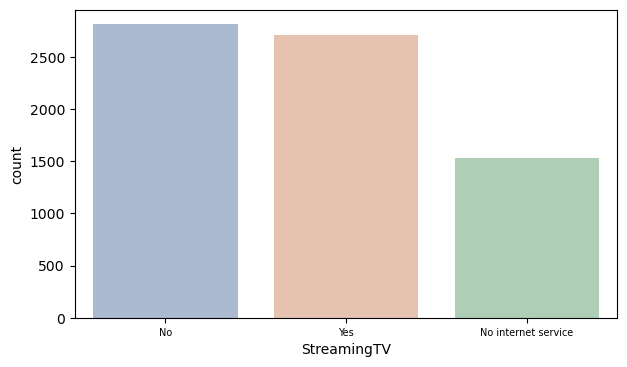

                     Target_Mean  Count  Ratio
StreamingMovies                               
No                         0.337   2785 39.543
No internet service        0.074   1526 21.667
Yes                        0.299   2732 38.790




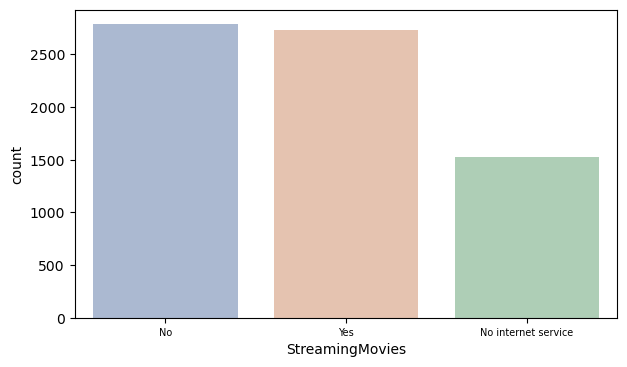

                Target_Mean  Count  Ratio
Contract                                 
Month-to-month        0.427   3875 55.019
One year              0.113   1473 20.914
Two year              0.028   1695 24.066




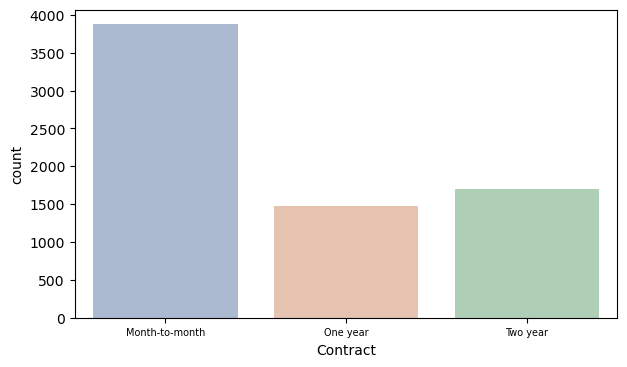

                  Target_Mean  Count  Ratio
PaperlessBilling                           
No                      0.163   2872 40.778
Yes                     0.336   4171 59.222




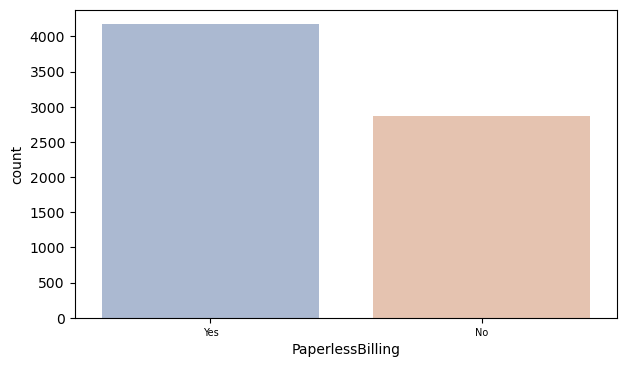

                           Target_Mean  Count  Ratio
PaymentMethod                                       
Bank transfer (automatic)        0.167   1544 21.922
Credit card (automatic)          0.152   1522 21.610
Electronic check                 0.453   2365 33.579
Mailed check                     0.191   1612 22.888




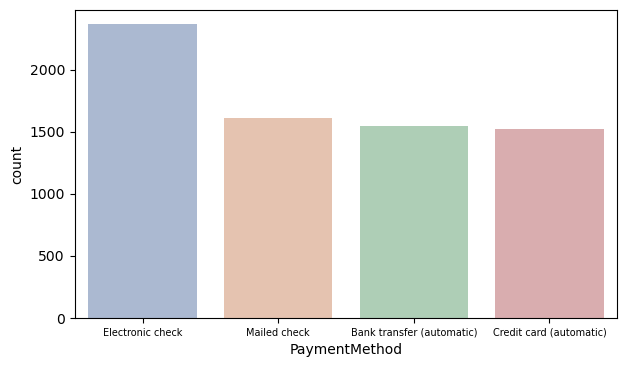

               Target_Mean  Count  Ratio
SeniorCitizen                           
0                    0.236   5901 83.785
1                    0.417   1142 16.215




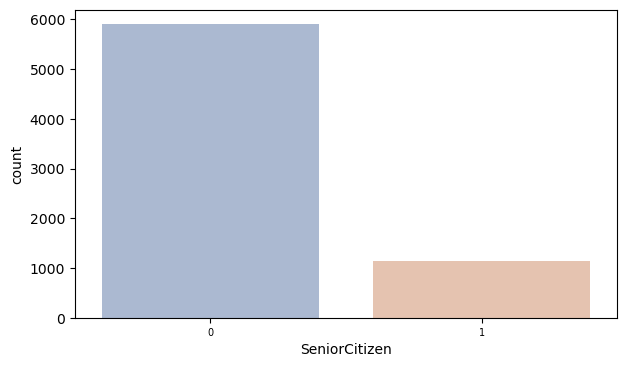

       Target_Mean  Count  Ratio
Churn                           
0            0.000   5174 73.463
1            1.000   1869 26.537




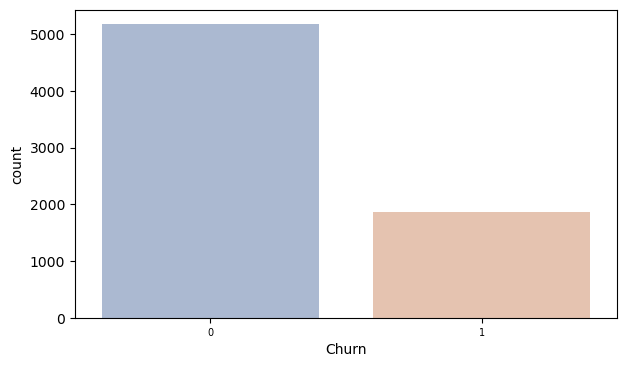

In [16]:
for col in cat_cols:
    print(pd.DataFrame({"Target_Mean": df.groupby(col)["Churn"].mean(),
                        "Count": df[col].value_counts(),
                        "Ratio": 100 * df[col].value_counts() / len(df)}), end="\n\n\n")
    plt.figure(figsize=(7, 4)) 
    sns.countplot(x=df[col], data=df, palette='deep', linewidth=2, alpha=0.5)
    plt.xticks(fontsize=7)
    #plt.savefig(f"images/targetmean_{col}.png")
    plt.show(block=True)
    

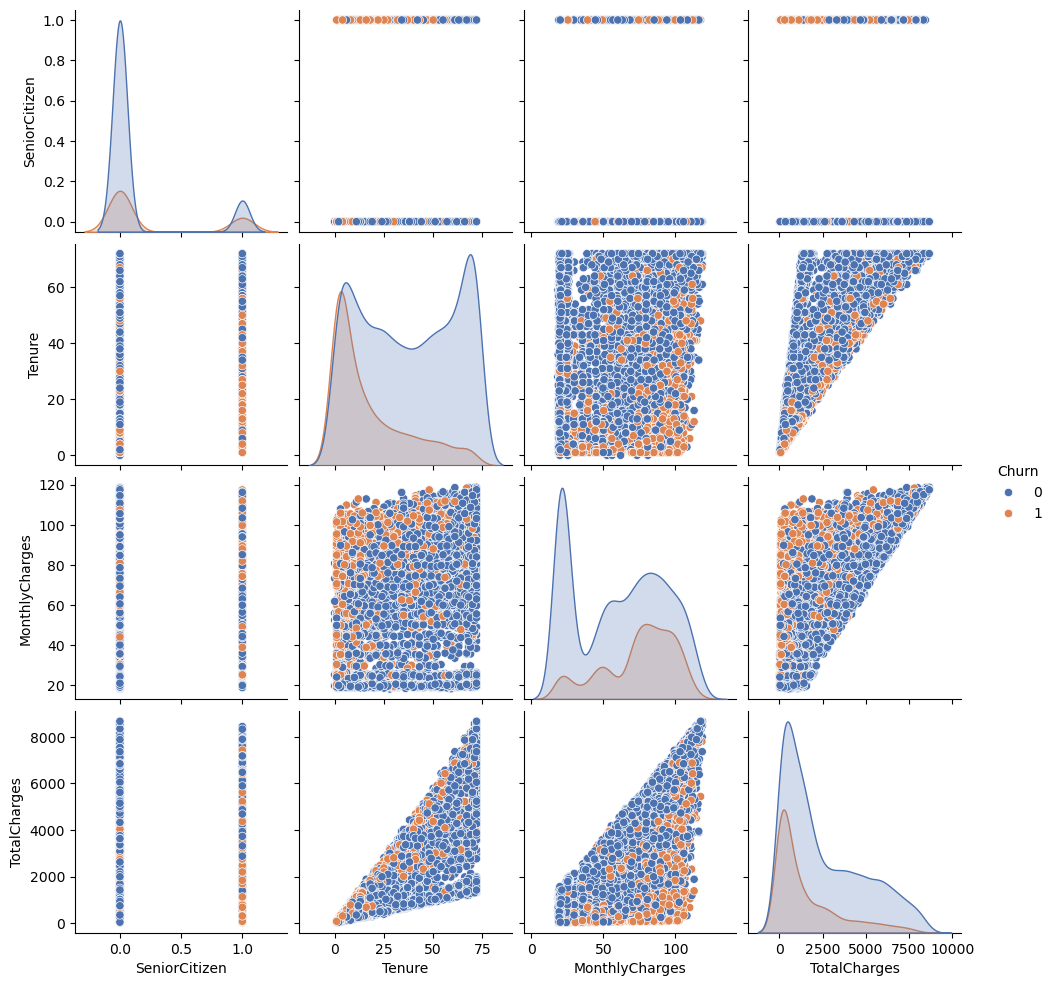

In [17]:
sns.pairplot(data=df, hue='Churn',palette='deep')
plt.savefig("images/pairplot.png")

In [18]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


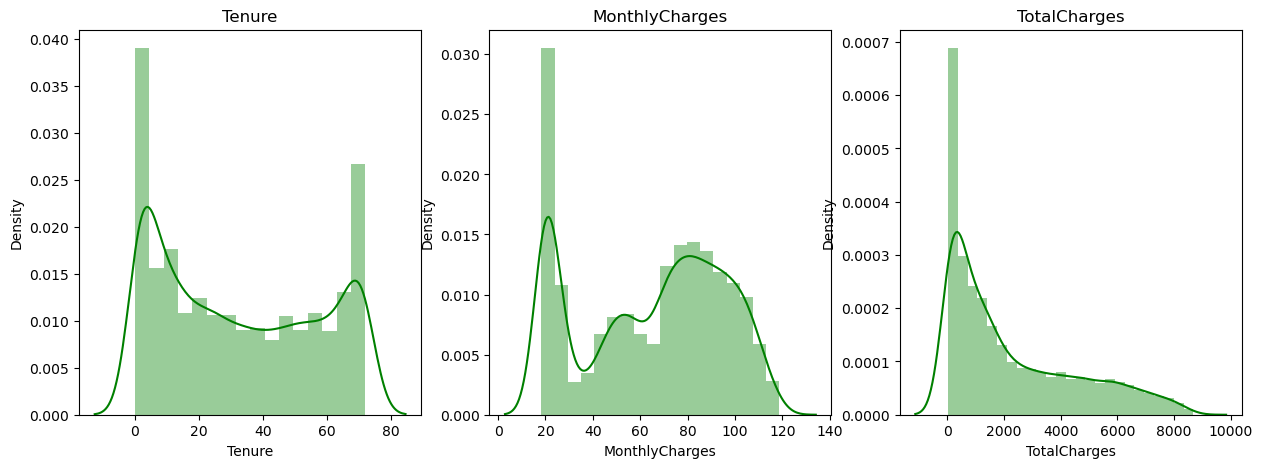

In [19]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(num_cols)):
    plt.subplot(1,3,i+1)
    sns.distplot(df[num_cols[i]],color = "green")
    title = num_cols[i]
    plt.title(title)
#plt.savefig("images/numcols.png")
plt.show()

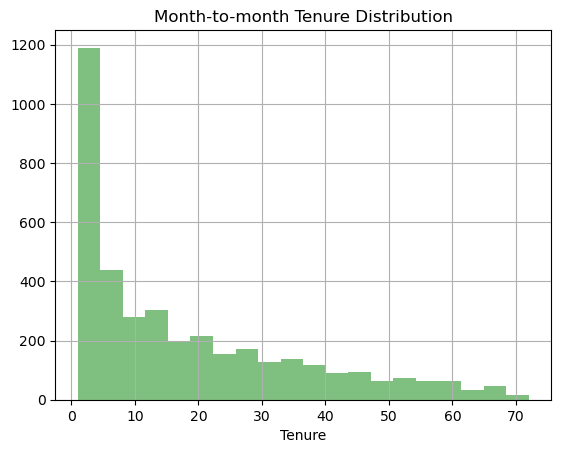

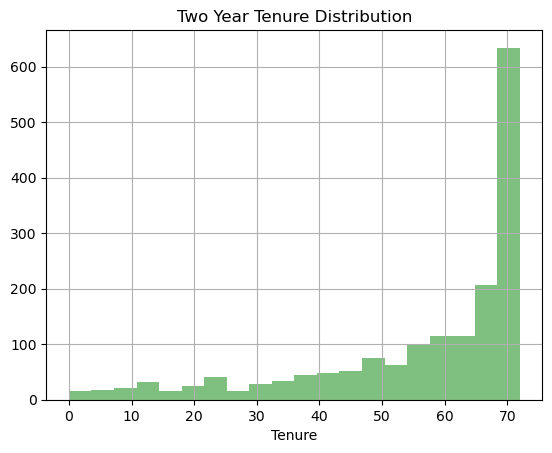

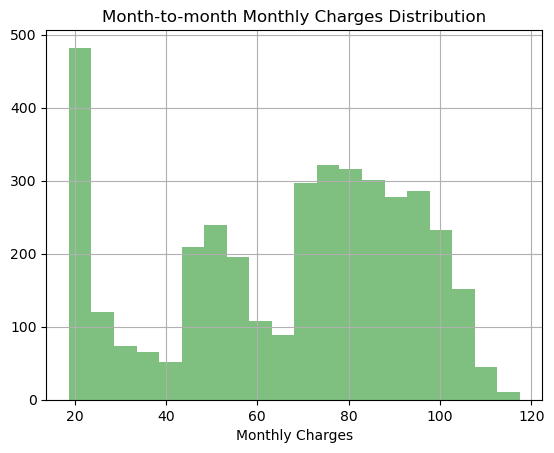

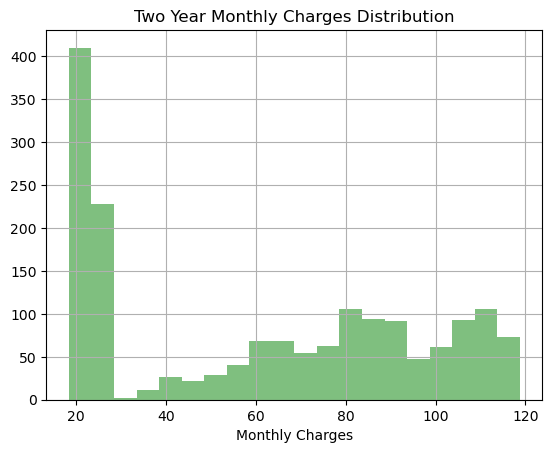

In [20]:
df[df["Contract"] == "Month-to-month"]["Tenure"].hist(bins=20, alpha=0.5, color='green')
plt.xlabel("Tenure")
plt.title("Month-to-month Tenure Distribution")
#plt.savefig("images/Month-to-month-Tenure.png")
plt.show()

df[df["Contract"] == "Two year"]["Tenure"].hist(bins=20, alpha=0.5, color='green')
plt.xlabel("Tenure")
plt.title("Two Year Tenure Distribution")
#plt.savefig("images/Two Year-Tenure.png")
plt.show()

df[df["Contract"] == "Month-to-month"]["MonthlyCharges"].hist(bins=20, alpha=0.5, color='green')
plt.xlabel("Monthly Charges")
plt.title("Month-to-month Monthly Charges Distribution")
#plt.savefig("images/Month-to-month-MonthlyCharges.png")
plt.show()

df[df["Contract"] == "Two year"]["MonthlyCharges"].hist(bins=20, alpha=0.5, color='green')
plt.xlabel("Monthly Charges")
plt.title("Two Year Monthly Charges Distribution")
#plt.savefig("images/Two Year-MonthlyCharges.png")
plt.show()

In [21]:
df[num_cols].corrwith(df["Churn"]).sort_values(ascending=False)

MonthlyCharges    0.193
TotalCharges     -0.199
Tenure           -0.352
dtype: float64

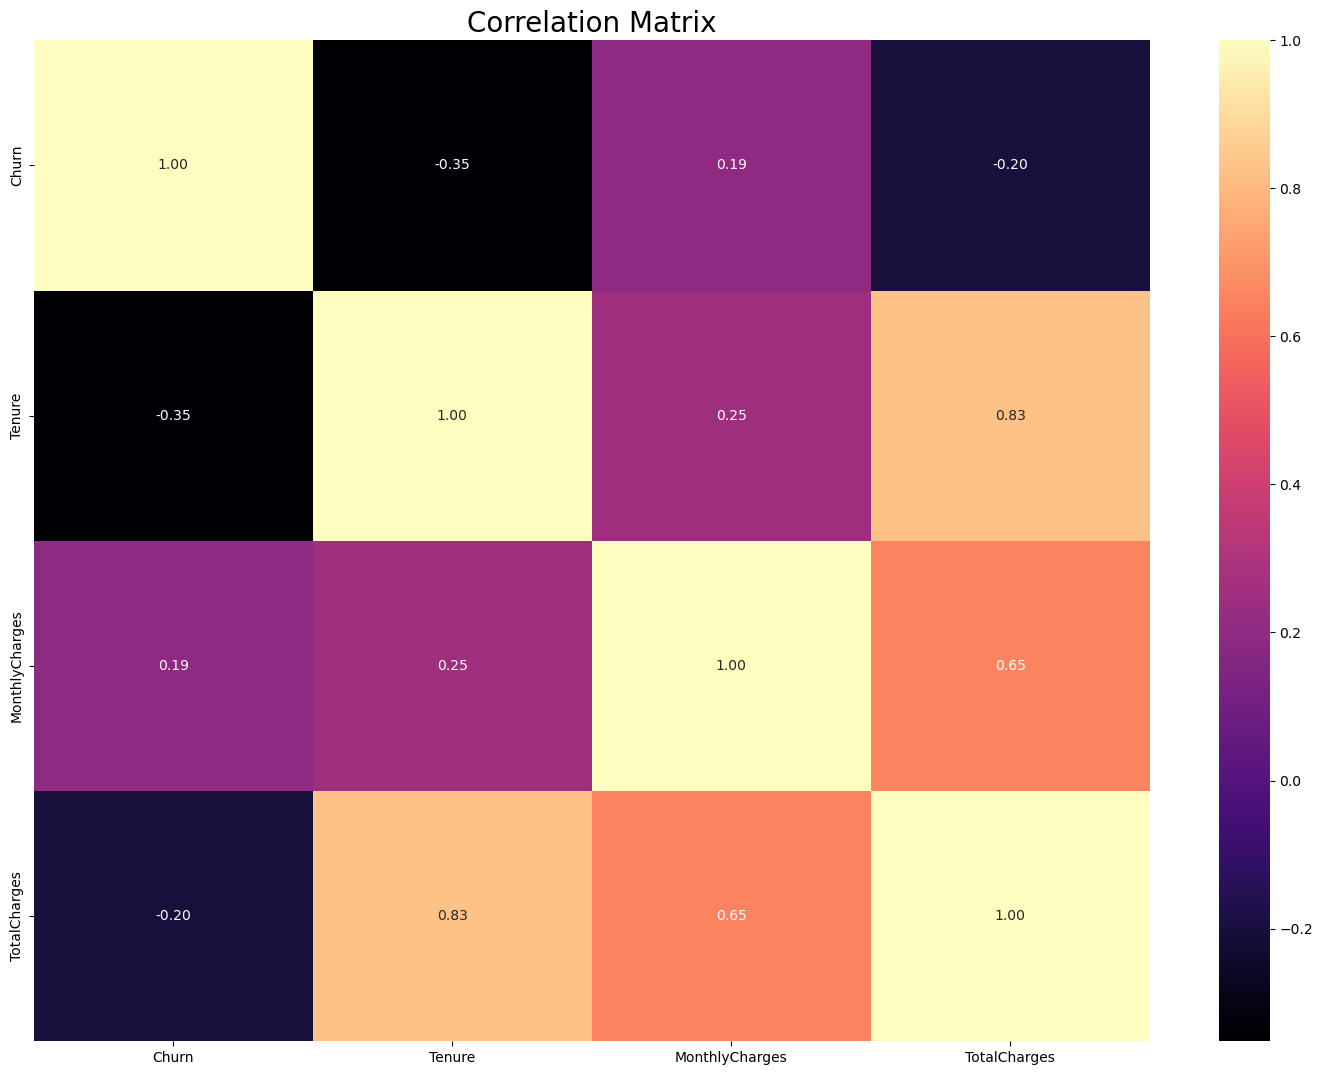

In [22]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[["Churn"]+num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
#plt.savefig("images/Correlation-Matrix")
plt.show()

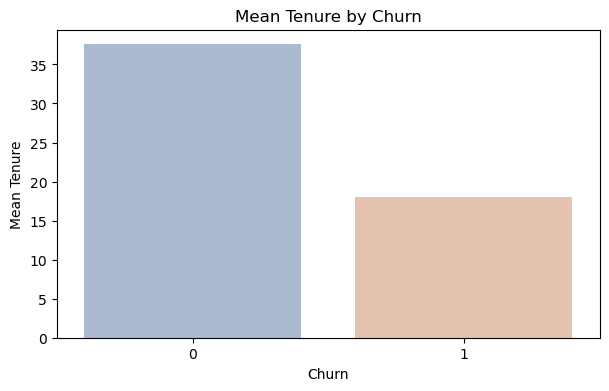

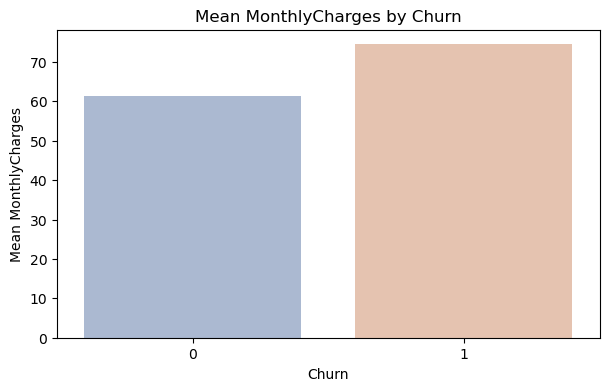

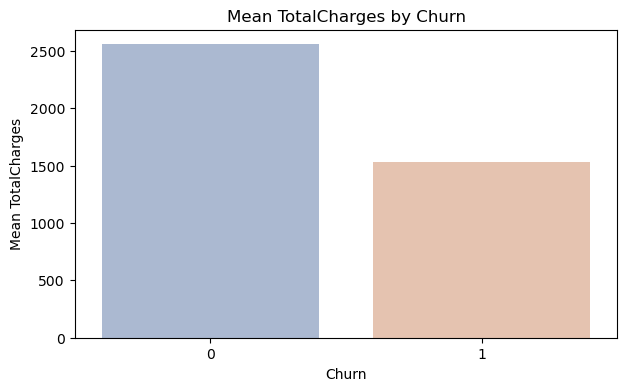

In [23]:
def target_summary_with_num(dataframe, target, numerical_col):
    plt.figure(figsize=(7, 4)) 
    sns.barplot(x=target, y=numerical_col, data=dataframe, ci=None, palette='deep', linewidth=2, alpha=0.5 )
    plt.title(f'Mean {numerical_col} by {target}')
    plt.xlabel(target)
    plt.ylabel(f'Mean {numerical_col}')
    plt.show()

for col in num_cols:
    target_summary_with_num(df, "Churn", col)

## FEATURE ENGINEERING

#### MISSING VALUES

In [24]:
df.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
print(missing_df, end="\n\n")

# TotalCharges sütunundaki eksik değerleri median ile doldurma
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

              n_miss  ratio
TotalCharges      11  0.160



In [26]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### OUTLIERS

In [27]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [28]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [29]:
def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.25, q3=0.75)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [30]:
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

Tenure False
MonthlyCharges False
TotalCharges False


#### FEATURE EXTRACTION

In [31]:
df.loc[(df["Tenure"]>=0) & (df["Tenure"]<=12),"YearlyTenure"] = "0-1 Year"
df.loc[(df["Tenure"]>12) & (df["Tenure"]<=24),"YearlyTenure"] = "1-2 Year"
df.loc[(df["Tenure"]>24) & (df["Tenure"]<=36),"YearlyTenure"] = "2-3 Year"
df.loc[(df["Tenure"]>36) & (df["Tenure"]<=48),"YearlyTenure"] = "3-4 Year"
df.loc[(df["Tenure"]>48) & (df["Tenure"]<=60),"YearlyTenure"] = "4-5 Year"
df.loc[(df["Tenure"]>60) & (df["Tenure"]<=72),"YearlyTenure"] = "5-6 Year"

In [32]:
df["LongTermContract"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

In [33]:
df["YoungNotLongTerm"] = df.apply(lambda x: 1 if (x["LongTermContract"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

In [34]:
df['TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [35]:
df["AnyStreaming"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

In [36]:
df["AutoPaymentIndicator"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

In [37]:
df["AvgCharges"] = df["TotalCharges"] / (df["Tenure"] + 1)

In [38]:
df["AvgServiceFee"] = df["MonthlyCharges"] / (df['TotalServices'] + 1)

In [39]:
df["Increase"] = df["AvgCharges"] / df["MonthlyCharges"]

In [40]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,YearlyTenure,LongTermContract,YoungNotLongTerm,TotalServices,AnyStreaming,AutoPaymentIndicator,AvgCharges,AvgServiceFee,Increase
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,0,0,14.925,14.925,0.500
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,0,3,0,0,53.986,14.238,0.948
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,3,0,0,36.050,13.463,0.669
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,0,3,0,1,40.016,10.575,0.946
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,0,0,50.550,35.350,0.715


In [41]:
df.shape

(7043, 30)

#### ENCODING

In [42]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['Gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [43]:
for col in binary_cols:
    df = label_encoder(df, col)

In [44]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,YearlyTenure,LongTermContract,YoungNotLongTerm,TotalServices,AnyStreaming,AutoPaymentIndicator,AvgCharges,AvgServiceFee,Increase
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,0,0,14.925,14.925,0.500
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,2-3 Year,1,0,3,0,0,53.986,14.238,0.948
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,0-1 Year,0,1,3,0,0,36.050,13.463,0.669
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,0,3,0,1,40.016,10.575,0.946
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,0,0,50.550,35.350,0.715


In [45]:
# One-Hot Encoding İşlemi
# cat_cols listesinin güncelleme işlemi
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "TotalServices"]]
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'YearlyTenure',
 'SeniorCitizen',
 'LongTermContract',
 'YoungNotLongTerm',
 'AnyStreaming',
 'AutoPaymentIndicator']

In [46]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()

,CustomerID,Gender,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalServices,AvgCharges,AvgServiceFee,Increase,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,YearlyTenure_1-2 Year,YearlyTenure_2-3 Year,YearlyTenure_3-4 Year,YearlyTenure_4-5 Year,YearlyTenure_5-6 Year,SeniorCitizen_1,LongTermContract_1,YoungNotLongTerm_1,AnyStreaming_1,AutoPaymentIndicator_1
0,7590-VHVEG,0,1,0,1,0,1,29.850,29.850,0,1,14.925,14.925,0.500,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,5575-GNVDE,1,0,0,34,1,0,56.950,1889.500,0,3,53.986,14.238,0.948,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False
2,3668-QPYBK,1,0,0,2,1,1,53.850,108.150,1,3,36.050,13.463,0.669,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,7795-CFOCW,1,0,0,45,0,0,42.300,1840.750,0,3,40.016,10.575,0.946,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True
4,9237-HQITU,0,0,0,2,1,1,70.700,151.650,1,1,50.550,35.350,0.715,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False


#### MODELLING

In [47]:
y = df["Churn"]
X = df.drop(["Churn","CustomerID"], axis=1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)

In [50]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('SVM', SVC(gamma='auto', random_state=42)),
    ("CatBoost", CatBoostClassifier(verbose=False, random_state=42))
]

results_dict = {
    "Model": [],
    "Accuracy": [],
    "AUC": [],
    "Recall": [],
    "Precision": [],
    "F1": []
}

for name, model in models:
    cv_results = cross_validate(model, X_train_scaled, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    results_dict["Model"].append(name)
    results_dict["Accuracy"].append(round(cv_results['test_accuracy'].mean(), 4))
    results_dict["AUC"].append(round(cv_results['test_roc_auc'].mean(), 4))
    results_dict["Recall"].append(round(cv_results['test_recall'].mean(), 4))
    results_dict["Precision"].append(round(cv_results['test_precision'].mean(), 4))
    results_dict["F1"].append(round(cv_results['test_f1'].mean(), 4))

df = pd.DataFrame(results_dict)
df

[LightGBM] [Info] Number of positive: 1346, number of negative: 3724
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1466
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265483 -> initscore=-1.017661
[LightGBM] [Info] Start training from score -1.017661
[LightGBM] [Info] Number of positive: 1346, number of negative: 3724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1466
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265483 -> initscore=-1.017661
[LightGB

,Model,Accuracy,AUC,Recall,Precision,F1
0,Logistic Regression,0.802,0.845,0.516,0.665,0.580
1,Random Forest,0.789,0.824,0.478,0.639,0.546
2,K-Nearest Neighbors,0.760,0.780,0.513,0.553,0.531
3,XGBoost,0.778,0.818,0.500,0.598,0.544
4,LightGBM,0.789,0.829,0.514,0.628,0.564
5,SVM,0.793,0.798,0.463,0.657,0.541
6,CatBoost,0.796,0.837,0.510,0.647,0.570


In [51]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_scaled, y_train)

logreg.score(X_test_scaled, y_test)

0.8105039034776437

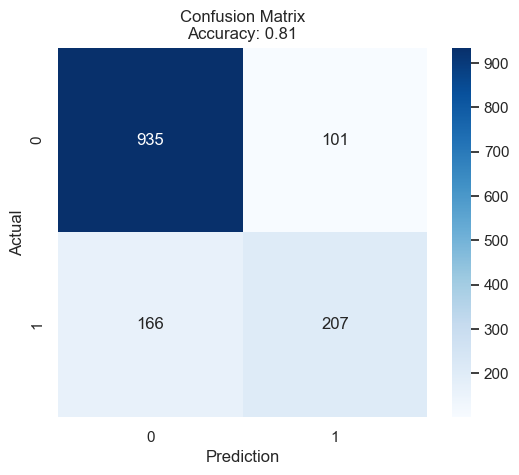

In [76]:
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(model, threshold=0.5): 
    y_predict = (model.predict_proba(X_test_scaled)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    
    plt.figure(dpi=100)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    
    plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
    #plt.savefig("images/confusion-matrix")
make_confusion_matrix(logreg)

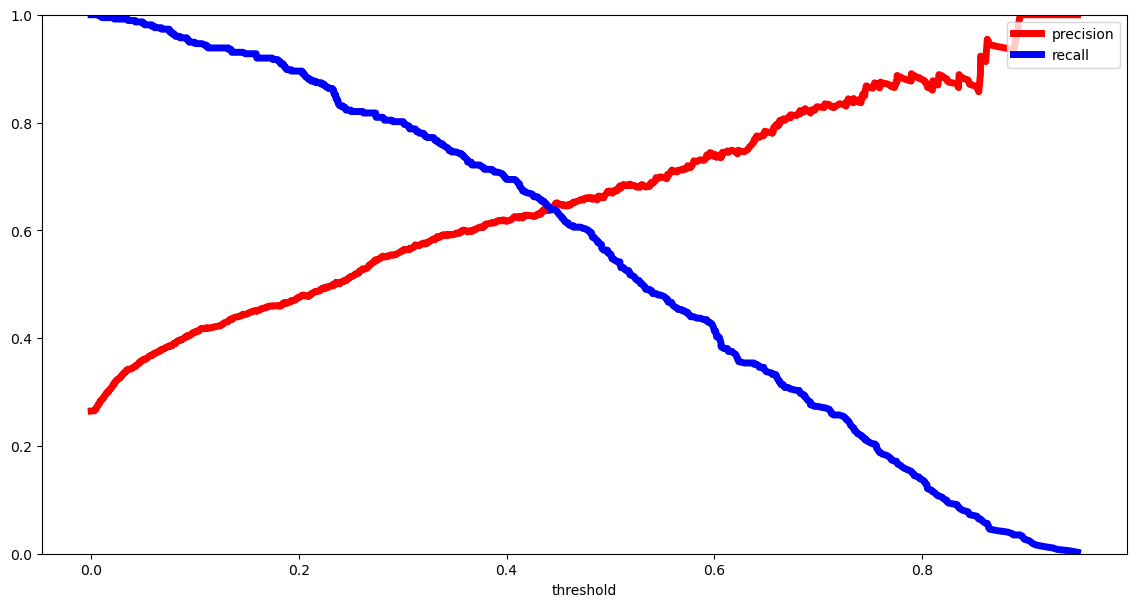

In [61]:
from sklearn.metrics import precision_recall_curve

y_scores = logreg.predict_proba(X_test_scaled)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=10)
    plt.legend(loc="upper right", fontsize=10)
    plt.ylim([0, 1])

plt.figure(figsize=[14, 7])
plot_precision_and_recall(precision, recall, threshold)

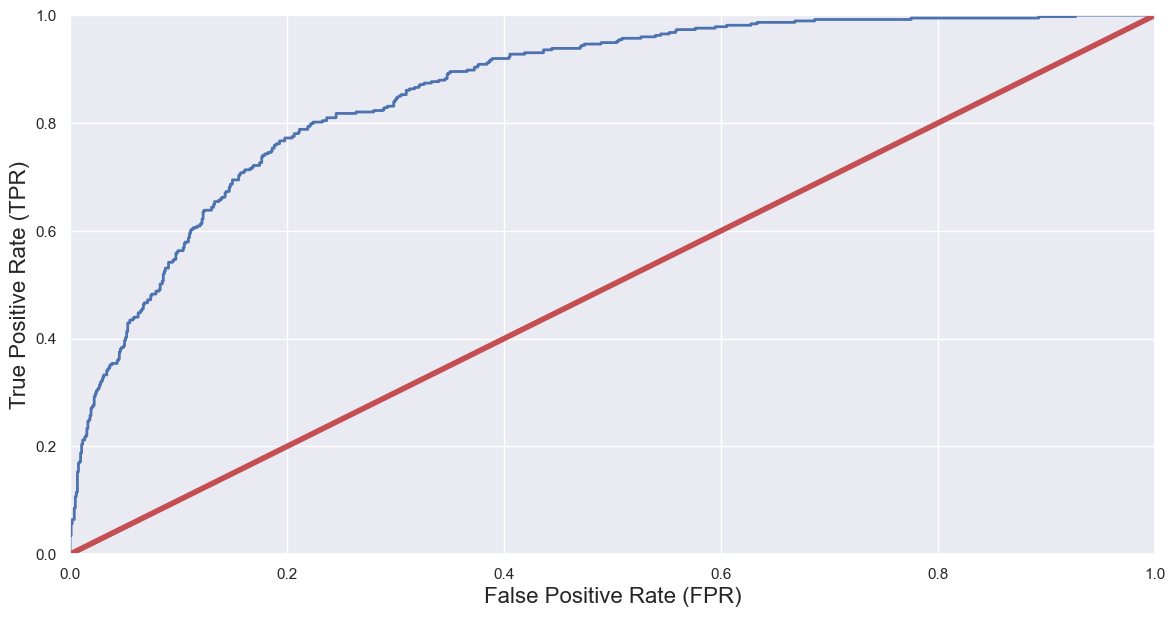

In [77]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
   # plt.savefig("images/roc-curve")

plt.figure(figsize=[14, 7])
plot_roc_curve(false_positive_rate, true_positive_rate)

In [63]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_test, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8626794642210192


In [68]:
random_user = X.sample(1)
random_user

,Gender,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,TotalServices,AvgCharges,AvgServiceFee,Increase,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,YearlyTenure_1-2 Year,YearlyTenure_2-3 Year,YearlyTenure_3-4 Year,YearlyTenure_4-5 Year,YearlyTenure_5-6 Year,SeniorCitizen_1,LongTermContract_1,YoungNotLongTerm_1,AnyStreaming_1,AutoPaymentIndicator_1
657,1,1,0,45,1,0,78.800,3597.500,6,78.207,11.257,0.992,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,True,True


In [69]:
logreg.predict(random_user)

array([1], dtype=int64)

#### Random Forests

In [70]:
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)
rf_best_grid.best_params_
rf_best_grid.best_score_

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_train, y_train)
cv_results = cross_validate(rf_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
results_df = pd.DataFrame({
    'Accuracy': cv_results['test_accuracy'].mean(),
    'F1 Score': cv_results['test_f1'].mean(),
    'ROC AUC': cv_results['test_roc_auc'].mean()
}, index=['Mean'])

print(results_df)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
      Accuracy  F1 Score  ROC AUC
Mean     0.799     0.568    0.837


#### XGBoost

In [71]:
xgboost_model = XGBClassifier(random_state=17)

xgboost_params = {"learning_rate": [0.1, 0.01, 0.001],
                  "max_depth": [5, 8, 12, 15, 20],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.5, 0.7, 1]}

xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X_train, y_train)

cv_results = cross_validate(xgboost_final, X_train, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc"])
results_df = pd.DataFrame({
    'Accuracy': cv_results['test_accuracy'].mean(),
    'F1 Score': cv_results['test_f1'].mean(),
    'ROC AUC': cv_results['test_roc_auc'].mean()
}, index=['Mean'])

print(results_df)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
      Accuracy  F1 Score  ROC AUC
Mean     0.800     0.574    0.842


#### LightGBM

In [72]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=17)

lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X_train, y_train)

cv_results = cross_validate(lgbm_final, X_train, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc"])
results_df = pd.DataFrame({
    'Accuracy': cv_results['test_accuracy'].mean(),
    'F1 Score': cv_results['test_f1'].mean(),
    'ROC AUC': cv_results['test_roc_auc'].mean()
}, index=['Mean'])

print(results_df)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000978 seconds.
You can set `force_col_wise=true` to remove the ov

#### FEATURE IMPORTANCE

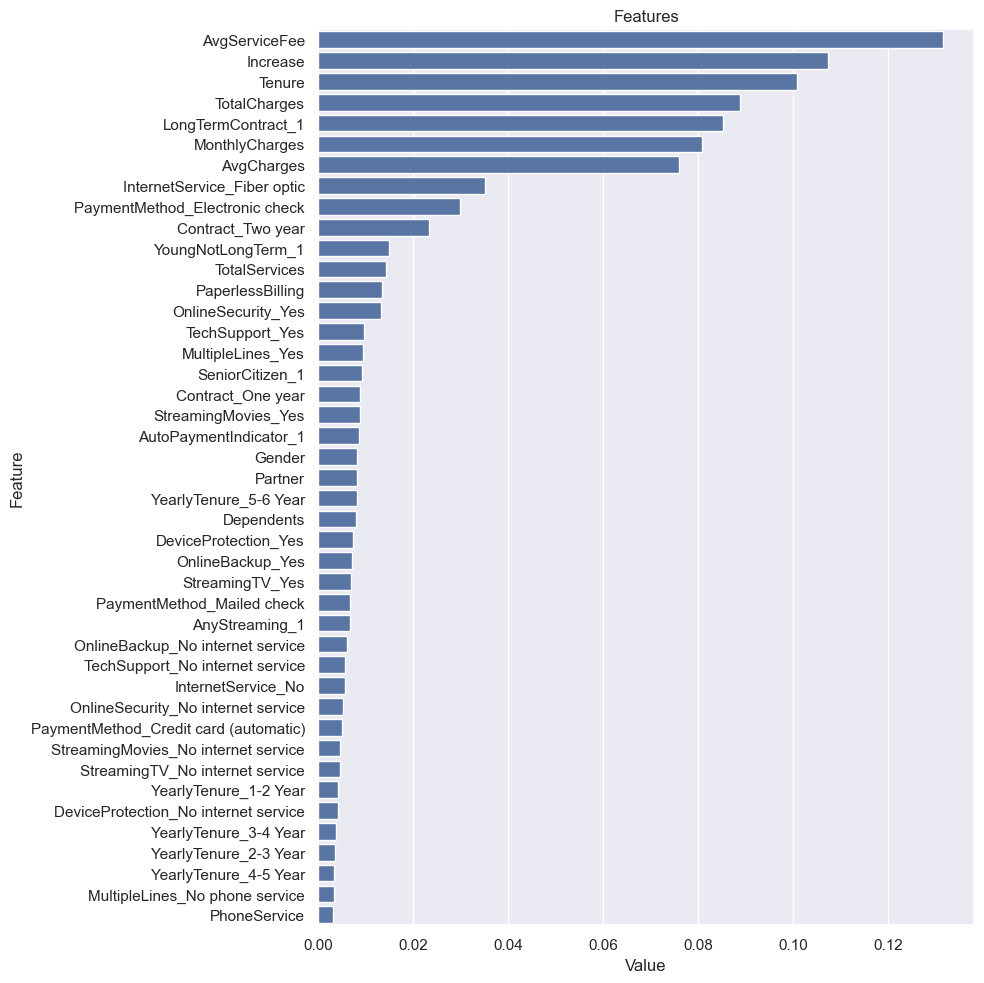

In [80]:
def plot_importance(model, features, num=len(X), save=True):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    if save:
        plt.savefig('images/importances.png')
    plt.show()
        
plot_importance(rf_final, X_train)

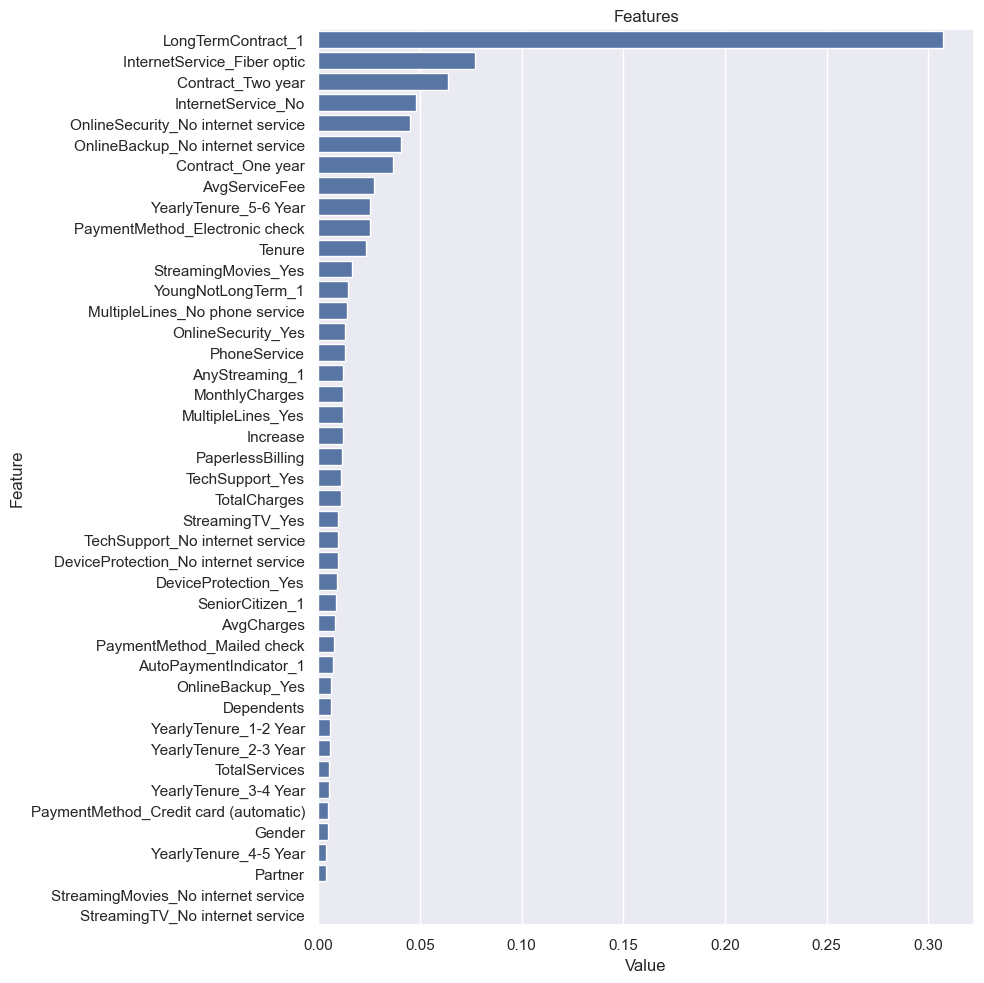

In [83]:
plot_importance(xgboost_final, X_train)

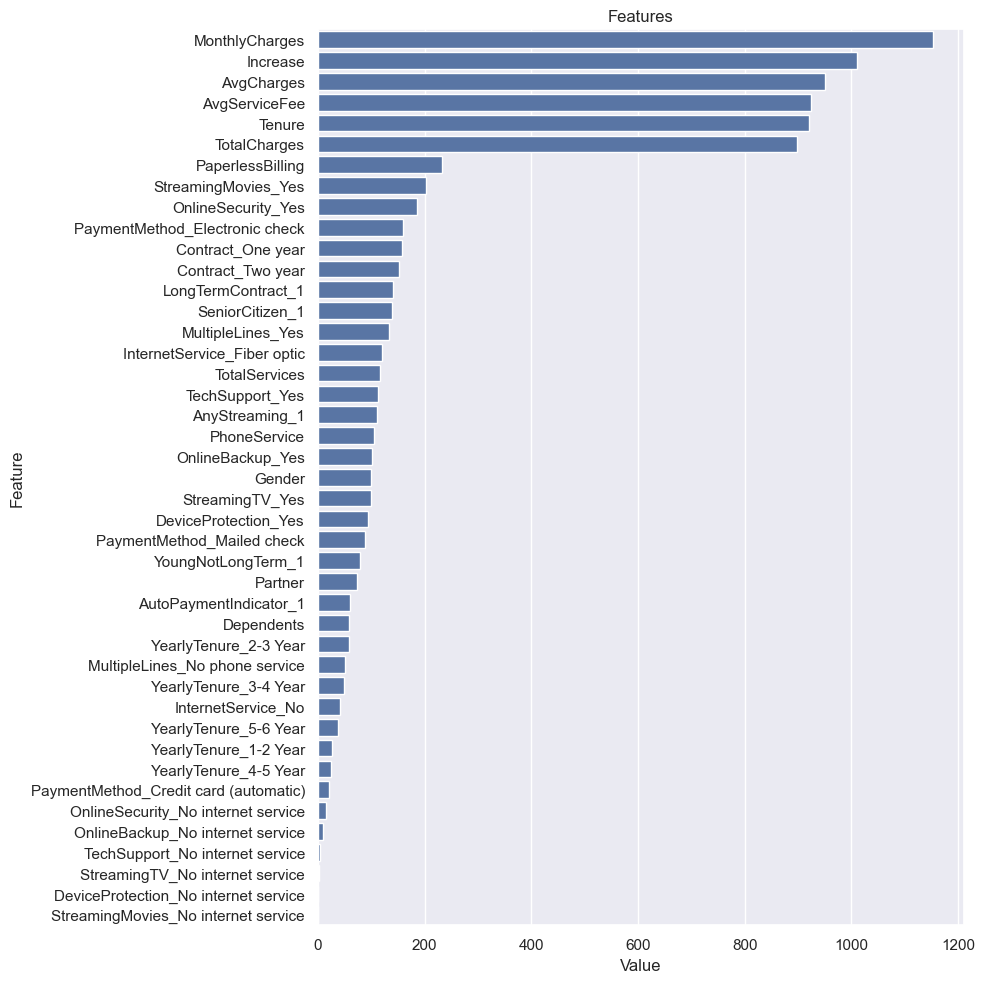

In [82]:
plot_importance(lgbm_final, X_train)